# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

C:\Users\hlakh\AppData\Local\Temp\ipykernel_27272\673991555.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mona = imageio.imread("mona.png")


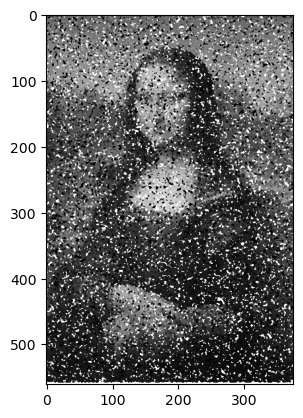

In [1]:
# use opencv to load and display the image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import imageio
from skimage.io import imread, imshow, imsave


# lire l'image (avec imread)

mona = imageio.imread("mona.png")

# afficher image

plt.imshow(mona)

In [2]:
# afficher la taille de l'image

mona.shape

(561, 375, 3)

In [3]:
# l'image a trois couleur R,G,B. afficher les valeurs des trois couleurs pour le pixel x = 150, et y = 100

# Récupérer les valeurs des trois couleurs pour le pixel (150, 100)
pixel_values = mona[100, 150]

# Afficher les valeurs des trois couleurs
print("Valeurs RVB pour le pixel (150, 100) :", pixel_values)



Valeurs RVB pour le pixel (150, 100) : [178 178 178]


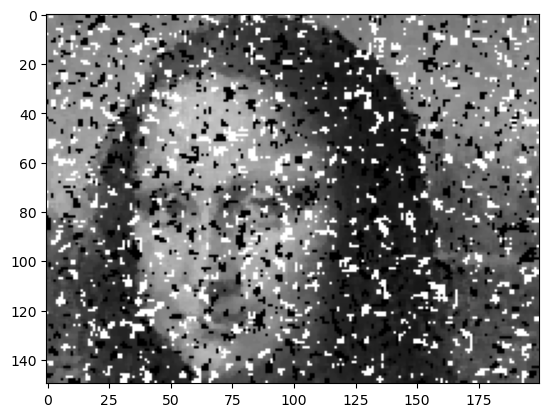

In [4]:
import cv2

# Définir les coordonnées du coin supérieur gauche et du coin inférieur droit du recadrage
x1, y1 = 100, 50  # Coordonnées du coin supérieur gauche
x2, y2 = 300, 200  # Coordonnées du coin inférieur droit

# Charger l'image
image = cv2.imread("mona.png")

# Recadrer l'image en fonction des coordonnées définies
cropped_image = image[y1:y2, x1:x2, :]

# Afficher l'image recadrée
cv2.imshow("Cropped Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cropped_image)  

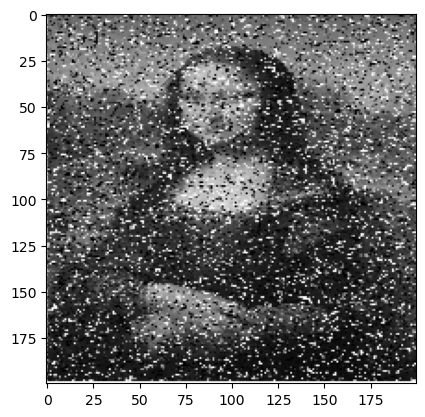

In [5]:
# Redimensionner l'image à 200x200 pixels
resized_image = cv2.resize(image, (200, 200))

# Afficher l'image redimensionnée
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

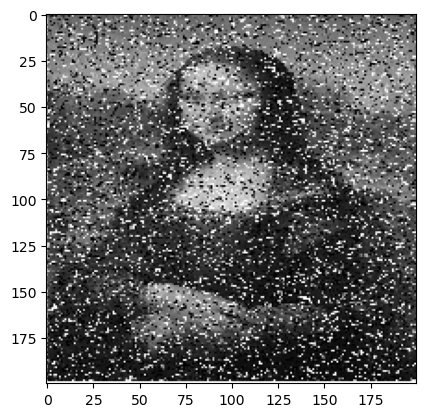

In [6]:
# redimentionner sans affecter:

#redimensioner l'image à 200x200 pixels
resized = cv2.resize(image,(200,200), interpolation = cv2.INTER_CUBIC)
# afficher resized
plt.imshow(resized)

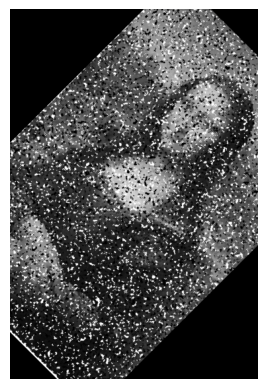

True

In [7]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("mona.png")

# Obtenir les dimensions de l'image
(h, w) = image.shape[:2]

# Calculer le centre de rotation
centre_rotation = (w // 2, h // 2)

# Définir la matrice de rotation
M = cv2.getRotationMatrix2D(centre_rotation, -45, 1.0)

# Effectuer la rotation de l'image
image_rotatee = cv2.warpAffine(image, M, (w, h))

# Afficher l'image rotée
plt.imshow(cv2.cvtColor(image_rotatee, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Enregistrer l'image rotée sur le disque
cv2.imwrite("mona_rotatee.png", image_rotatee)

Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

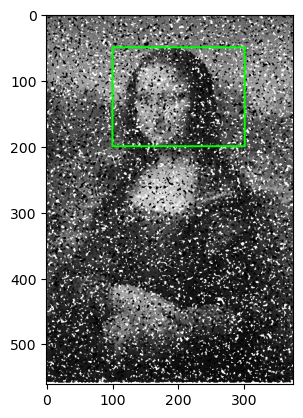

In [8]:
# dessiner un rectangle

# Coordonnées du coin supérieur gauche et du coin inférieur droit du rectangle
x1, y1 = 100, 50  # Coin supérieur gauche
x2, y2 = 300, 200  # Coin inférieur droit

# Couleur du rectangle (en BGR)
couleur = (0, 255, 0)  # Vert

# Épaisseur de la ligne du rectangle
epaisseur_ligne = 2

# Dessiner le rectangle sur l'image
image_rectangle = cv2.rectangle(image, (x1, y1), (x2, y2), couleur, epaisseur_ligne)

# Afficher l'image avec le rectangle
cv2.imshow("Image avec Rectangle", image_rectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image_rectangle)

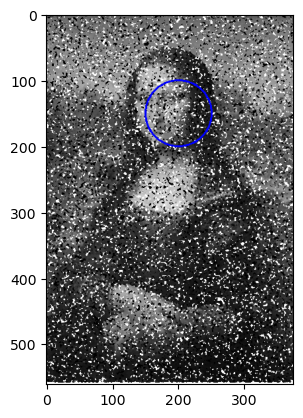

In [9]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("mona.png")

# Coordonnées du centre du cercle
centre = (200, 150)

# Rayon du cercle
rayon = 50

# Couleur du cercle (en BGR)
couleur = (0, 0, 255)  # Rouge

# Épaisseur de la ligne du cercle (si négatif, le cercle est rempli)
epaisseur_ligne = 2

# Dessiner le cercle sur l'image
image_cercle = cv2.circle(image, centre, rayon, couleur, epaisseur_ligne)

# Afficher l'image avec le cercle
cv2.imshow("Image avec Cercle", image_cercle)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image_cercle)
plt.show()

C:\Users\hlakh\AppData\Local\Temp\ipykernel_27272\2881986666.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("bois.png")


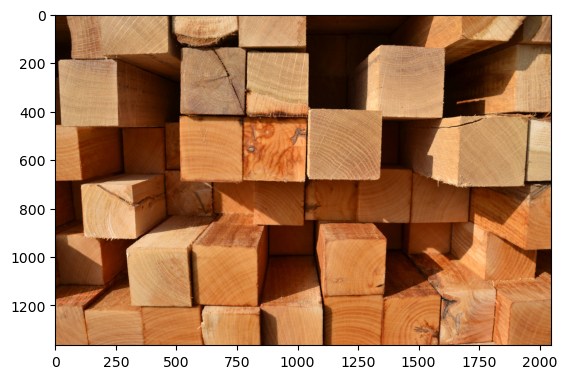

In [22]:
import imageio
import matplotlib.pyplot as plt

# Charger l'image
image = imageio.imread("bois.png")

# Afficher l'image
plt.imshow(image)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

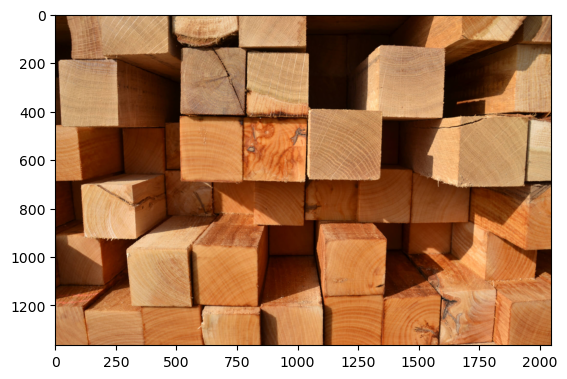

In [23]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2

# Définir le noyau
kernel = np.ones((2, 2), np.float32) / 4

# Appliquer le filtre
filtered_image = cv2.filter2D(image, -1, kernel)

# Afficher l'image filtrée
cv2.imshow("Filtered Image", filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

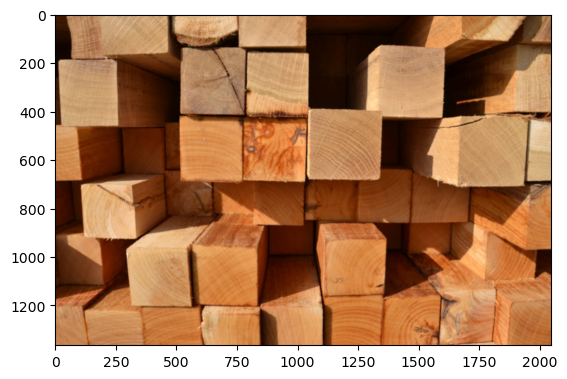

In [24]:
# Appliquer blur avec un kernel de taille 5x5

# Appliquer un flou avec un noyau de taille 5x5 en utilisant cv2.blur()
blurred_image = cv2.blur(image, (5, 5))

# Afficher l'image floutée
cv2.imshow("Blurred Image", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(blurred_image)
plt.show

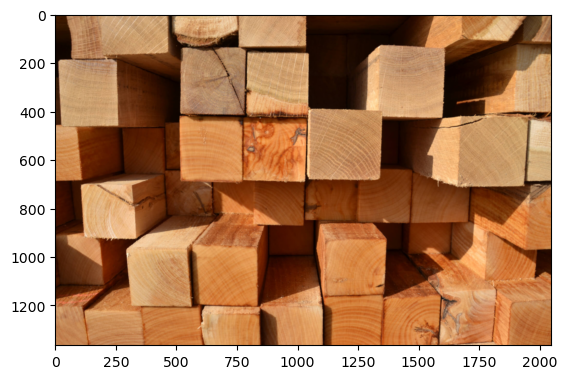

In [25]:
# gaussian blur


# Appliquer un flou gaussien avec un noyau de taille 5x5 et un écart-type de 0 (déterminé automatiquement)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Afficher l'image floutée
cv2.imshow("Blurred Image", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(blurred_image)
plt.show()

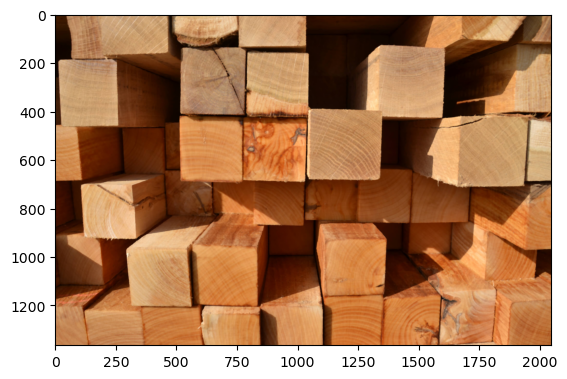

In [26]:
# median blur

# Appliquer un flou médian avec une taille de noyau de 5x5
blurred_image = cv2.medianBlur(image, 5)

# Afficher l'image floutée
cv2.imshow("Blurred Image", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(blurred_image)
plt.show()

In [29]:
# sharpening:

# Définir le noyau de sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

# Appliquer le filtre de sharpening
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Afficher l'image sharpened
cv2.imshow("Sharpened Image", sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
sharp = sharpened_image + image
cv2.imshow("Sharp", sharp)
cv2.waitKey(0)
cv2.destroyAllWindows()

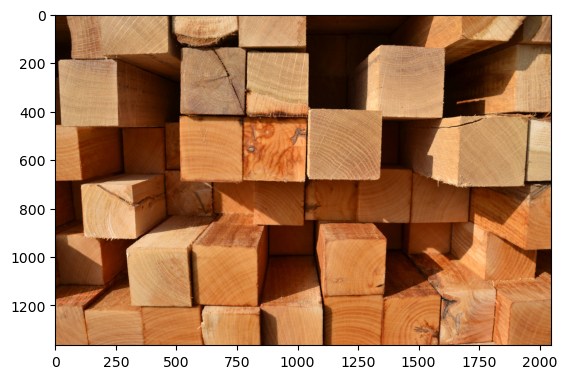

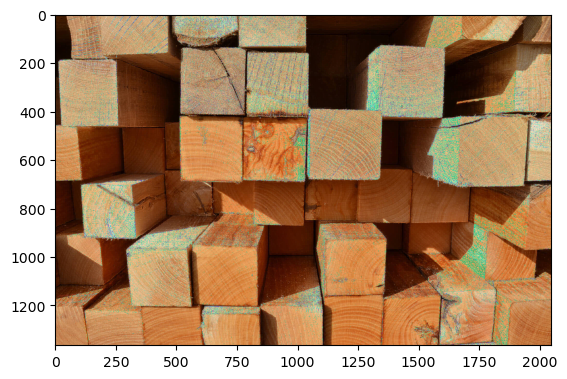

In [31]:
plt.imshow(image)
plt.show()
plt.imshow(sharp)
plt.show()

In [32]:
# bilateral filtering

# Appliquer le filtrage bilatéral
bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

# Afficher l'image originale et l'image filtrée
cv2.imshow("image", image)
cv2.imshow("Bilateral Filtered Image", bilateral_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

In [33]:
# appliquer un seuillage binaire d'un seuil de 127

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec un seuil de 127
ret, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Afficher l'image originale, l'image filtrée et l'image seuillée
cv2.imshow("Original Image", image)
cv2.imshow("Bilateral Filtered Image", bilateral_filtered_image)
cv2.imshow("Binary Thresholded Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
# appliquer un seuillage binaire d'un seuil de 30

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage binaire avec un seuil de 127
ret, binary_image = cv2.threshold(gray_image, 30, 255, cv2.THRESH_BINARY)

# Afficher l'image originale, l'image filtrée et l'image seuillée
cv2.imshow("Original Image", image)
cv2.imshow("Bilateral Filtered Image", bilateral_filtered_image)
cv2.imshow("Binary Thresholded Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# appliquer un seuillage binaire d'un seuil de 240


Qu'est ce que vous remarquez ?!

In [ ]:
# appliquer "Otsu" seuillage


In [ ]:
# appliquer "Adaptive threshold"


# Détection des bords

* Sobel
* Canny

In [ ]:
# utiliser la methode sobel pour détecter les bords
# Vous pouvez utiliser d'autres images de votre choix



In [ ]:
# Canny


# Détection des contours

In [ ]:
# charger l'image 02
# faites une recherche sur internet pour détecter les contours des objets dans image_02



#  Compter des objets

In [ ]:
# Compter les objets


# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

In [ ]:
#

Bravo !